# Data Exploration: Bone Fracture Classification

In this notebook, we will explore X-ray images for bone fracture classification. The dataset includes images of various anatomical body regions, such as the lower limb, upper limb, lumbar, hips, knees, and more.

Our goal is to gain a better understanding of the dataset by analyzing and visualizing the data.

You can find the dataset on Kaggle: [Fracture Multi-region X-ray Data](https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data/data). 


In [75]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [76]:
# Define the path to the data folder
data_folder = os.path.join("..", "data")

# List the datasets available in the data folder
datasets = os.listdir(data_folder)
print("Datasets:", datasets)

Datasets: ['train', 'test', 'val']


In [77]:
# List the class labels in the training dataset
class_labels = os.listdir(os.path.join("..", "data/train"))
print("Class labels:", class_labels)

Class labels: ['not fractured', 'fractured']


We have two classes for X-ray images: "fractured" and "not fractured".

Let's analyse the the proportion of each class in our datasets : train, validation and test set

In [4]:
def count_images_in_class(dataset_path):
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

def calculate_percentages(dataset_counts):
    total_images = sum(dataset_counts.values())
    percentages = {class_name: count / total_images * 100 for class_name, count in dataset_counts.items()}
    return percentages


In [74]:
for dataset in datasets:
    dataset_path = os.path.join(data_folder, dataset)
    dataset_counts = count_images_in_class(dataset_path)
    percentages = calculate_percentages(dataset_counts)
    
    print(f"Dataset: {dataset.upper()}")
    print(f"total number: {dataset_counts}")
    
    for class_label in class_labels:
        print(f"{class_label}: {percentages.get(class_label, 0):.2f}%")
    print()

Dataset: TRAIN
total number: {'not fractured': 4640, 'fractured': 4606}
not fractured: 50.18%
fractured: 49.82%

Dataset: TEST
total number: {'not fractured': 268, 'fractured': 238}
not fractured: 52.96%
fractured: 47.04%

Dataset: VAL
total number: {'not fractured': 492, 'fractured': 337}
not fractured: 59.35%
fractured: 40.65%



- In the train and test datasets, there is a relatively balanced distribution between the "not fractured" and "fractured" classes, with the percentages being close to each other (within a few percentage points).
- However, in the val (validation) dataset, there is a noticeable class imbalance, with a higher percentage of "not fractured" images compared to "fractured" images. This class imbalance could potentially impact the model's performance during validation.

Let's view some random examples of each class.

In [69]:

def view_random_images(dataset_dir, classes, num_images_per_class=4):
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir)
        random_images = random.sample(image_files, num_images_per_class)
        
        fig = plt.figure(figsize=(10, 4))
        fig.suptitle(class_name, fontsize=20)
        for i, image_name in enumerate(random_images, 1):
            image_path = os.path.join(class_dir, image_name)
            plt.subplot(1, num_images_per_class, i)
            img = mpimg.imread(image_path)
            plt.imshow(img,cmap='gray')
            plt.title("shape: "+str(img.shape))
            plt.axis('off')
        plt.show()


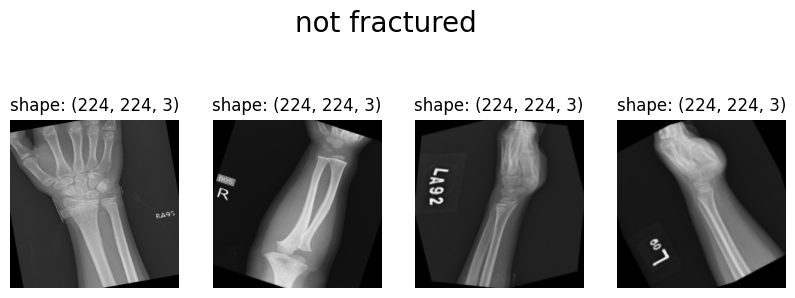

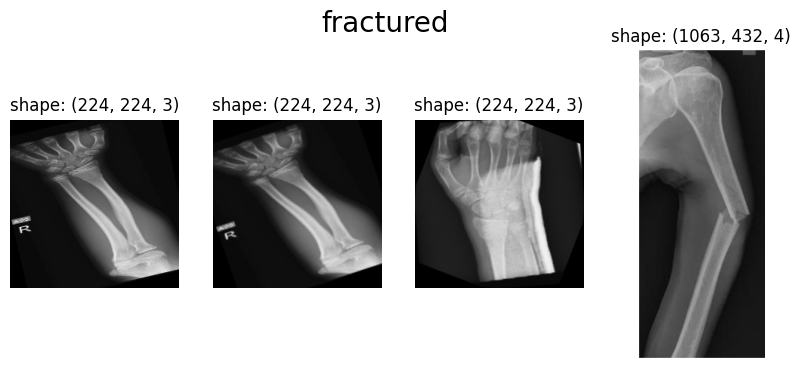

In [70]:
view_random_images('../data/train/', class_labels)

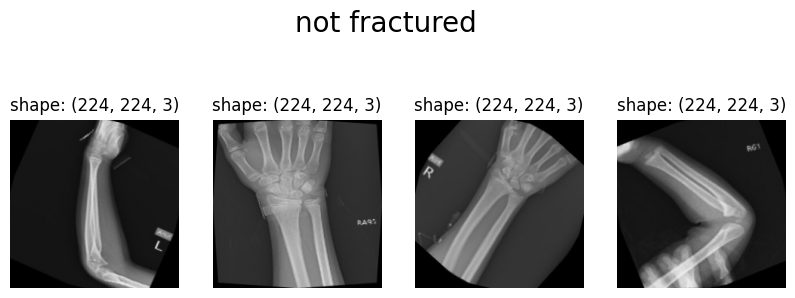

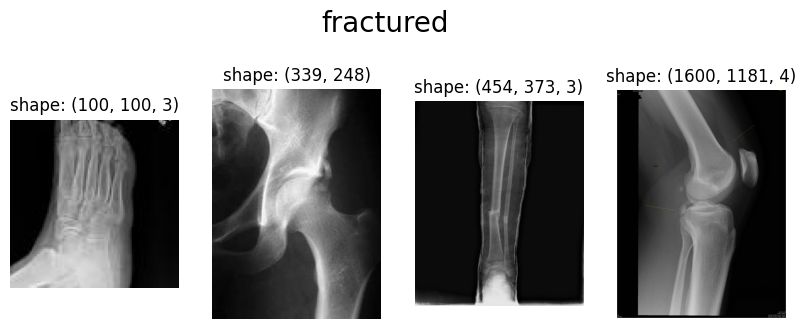

In [71]:
view_random_images('../data/val/', class_labels)

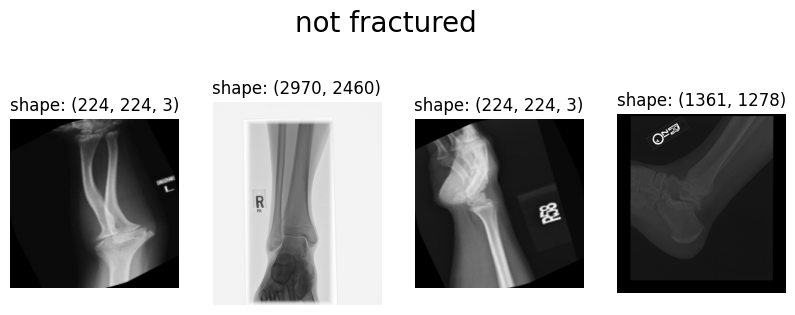

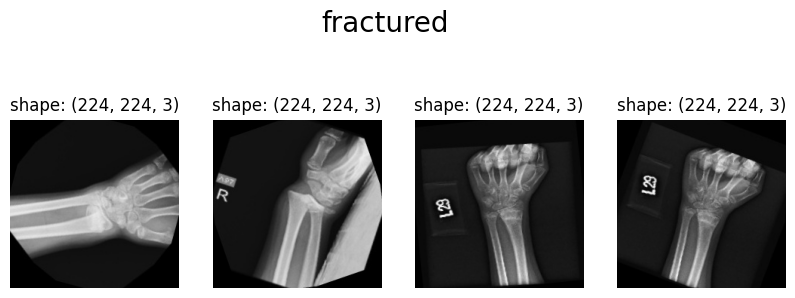

In [72]:
view_random_images('../data/test/', class_labels)

### Key Observations and Insights:

- Some images depicting fractured bones feature annotations such as arrows or circles indicating the location of the fracture. While these annotations may aid in fracture identification, reliance on them by the model could potentially lead to overfitting.
- Not all images in the dataset adhere to standardized dimensions, such as the common (224, 224, 3) dimensions used in image processing tasks with CNNs, with some being two-dimensional. Considering training on two-dimensional images, particularly if color information is minimal, presents a viable option. Additionally, resizing or padding images to a consistent size is necessary to ensure compatibility with convolutional neural network architectures.
- The presence of inverted images in the test set suggests a need for data augmentation strategies, such as color inversion, during training.This augmentation technique can enhance the model's robustness to variations in image orientation and improve its performance on unseen data. 